In [4]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import seaborn as sns

ModuleNotFoundError: No module named 'shapely'

Firstly, we need to set our parameters. What type of distributions do we use?

## Econ Courses

For EC100, appears to be a normal distribution with mean ~ 67, SD ~ 10.5.

![images/EC100.png](images/EC100.png)

EC102 has varied a lot more YoY, for reasons I am not too sure about. Pre-COVID, average was 65, post-COVID is 68-69. SD around 12.

![images/EC102.png](images/EC102.png)

## Maths Department

MA100: seems to be very flat distribution, with varying means. Before COVID, mean was around 60%. Now 67% or more, 72% in 2021. SD 19 pre-COVID, 14 post-COVID.

![images/MA100.png](images/MA100.png)

MA107: mean around 68, SD around 17.

![images/MA107.png](images/MA107.png)

## Statistics

For ST102, there was an anomaly in 2019/20. Otherwise, mean is 68, SD is 15-19 (say 17).

![images/ST102.png](images/ST102.png)

Based on the above, we set the variables below. That said, it really shouldn't matter. We can see that a lot of these distributions are roughly normal.

Clear trends during online exams:
- Greater $\mu$, could be do to with 'easier' exams or collaboration increasing scores for some.
- A smaller $\sigma$ - less variance with the higher mean also means more people getting a first.

In [ ]:
mean = 67
stdev = 14
n = 1000
first_mark = 70

In [ ]:
# we can create a 'random' normal distribution to simulate n people taking exams.
norm_exam = stats.norm.rvs(size = n, loc = mean, scale = stdev)

# need to ensure that the values are within the parameters of our discussion; that is, exam score must be b/w 0 and 100. - this implementation might be slightly statistically flawed. alternative is to set all values below 0 to 0, all values above 100 to 100. 
for score in np.nditer(norm_exam, op_flags=['readwrite']):
    while score > 100.0:
        x = stats.norm.rvs(loc = mean, scale = stdev, size = 1)
        score[...] = np.mean(x)
    while score <0:
        x = stats.norm.rvs(loc = mean, scale = stdev, size = 1)
        score[...] = np.mean(x)


Text(0.5, 0, 'Exam Score')

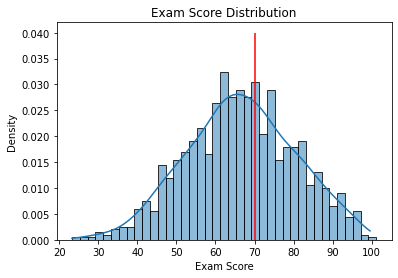

In [ ]:
norm_exam_plt = sns.histplot(x=norm_exam, binwidth = 2, kde = True, stat='density', label = 'Exam Dist')
plt.vlines(first_mark, 0, 0.04, color='r', label='First', colors="r")
plt.title('Exam Score Distribution')
plt.xlabel('Exam Score')

Extract the KDE so that we can calculate cumulative distributions and the like.

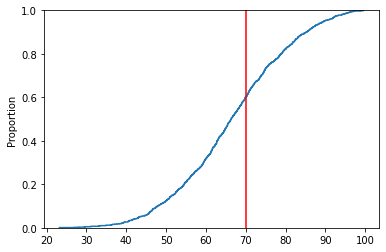

In [ ]:
cdf = sns.ecdfplot(data=norm_exam)
plt.vlines(first_mark, 0, 1, color='r', label='First', colors="r")

In [ ]:
x = np.sort(norm_exam)
cdf_values = np.arange(n) / n
first_cdf = 1 - np.interp(70,x, cdf_values)
print(first_cdf)

NameError: name 'norm_exam' is not defined

matplotlib.collections.LineCollection

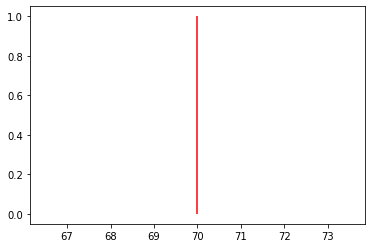

In [ ]:
line1 = LineString([(0,1),(1,1)])
line2 = LineString()

around 40% of students get a first with our current 